In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats.stats import pearsonr
sns.set_style('darkgrid')
import os

In [9]:
pearsonr?

$$ r = \frac{\sum (x - m_x) (y - m_y)}
             {\sqrt{\sum (x - m_x)^2 \sum (y - m_y)^2}} $$

In [76]:
length = 100
x = np.random.normal(0, 10, length)
y = x + np.random.normal(0, 10, length)

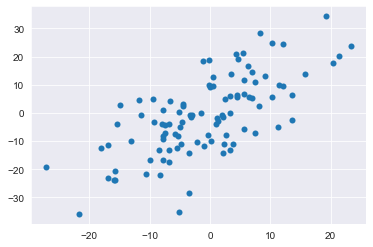

In [77]:
plt.scatter(x, y, linewidths=0.02)

In [30]:
plt.scatter?

$$ dot(x,y) = {\sum x_i  y_i} $$
             

In [78]:
def dot_product(x1, x2):
    dot = 0
    for i in range(len(x1)):
        dot += x1[i] * x2[i]
    return dot

In [81]:
dot_product(x, y)

9191.777660495196

In [83]:
np.dot(x, y)

9191.77766049519

In [82]:
np.dot(x, y)/(np.std(x)* np.std(y)) / length

0.6959355532905982

In [84]:
pearsonr(x,y)[0]

0.6896596777684282

In [16]:
path = '../data/stock_dfs'
names = os.listdir(path)[:20]

In [96]:
names[0][:-4]

'CSCO'

In [17]:
main_df = pd.DataFrame()

for name in names:
    adds = os.path.join(path, name)
    df = pd.read_csv('{}'.format(adds))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close':name[:-4]}, inplace=True)
    df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')
        
print(main_df.head())
#main_df.to_csv('sp500_joined_closes.csv')

                 CSCO        UAL        TROW        ISRG          NVR  \
Date                                                                    
2019-06-07  54.244591  83.269997  102.618179  499.040009  3391.000000   
2019-06-10  54.719818  82.669998  103.860970  509.720001  3402.350098   
2019-06-11  55.389030  82.769997  103.569687  506.559998  3370.820068   
2019-06-12  54.176701  83.790001  102.783226  501.920013  3395.000000   
2019-06-13  54.477356  87.110001  103.751404  505.600006  3395.810059   

                 PRGO        TPR        DVN          CE        MRO  \
Date                                                                 
2019-06-07  43.477894  28.972601  25.137054   98.704704  13.140017   
2019-06-10  43.270485  28.704424  25.557800  100.149345  13.278229   
2019-06-11  43.448265  28.464983  25.538229  101.135223  13.238739   
2019-06-12  42.905037  27.612564  24.931574  101.701370  12.853720   
2019-06-13  43.468018  28.675692  25.648396  102.745819  13.110398  

In [ ]:
sns.pairplot(main_df.head(5), kind='reg')

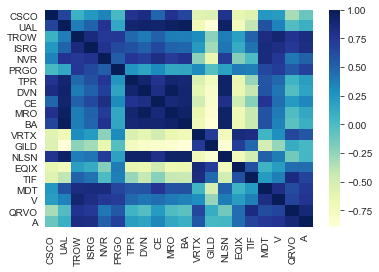

In [18]:
sns.heatmap(main_df.corr(), cmap="YlGnBu")

In [5]:
sns.pairplot?

In [14]:
sns.heatmap?

In [20]:
main_df.corr()['UAL'].sort_values(ascending=False)

UAL     1.000000
BA      0.978618
MRO     0.953033
NLSN    0.942935
DVN     0.922265
CE      0.915604
TPR     0.907738
NVR     0.765255
CSCO    0.679834
MDT     0.595198
ISRG    0.498858
TROW    0.370488
V       0.353471
PRGO    0.147067
A       0.092149
QRVO   -0.016236
TIF    -0.406724
VRTX   -0.696135
EQIX   -0.710626
GILD   -0.899307
Name: UAL, dtype: float64